In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.rcParams['font.family'] = 'Arial'

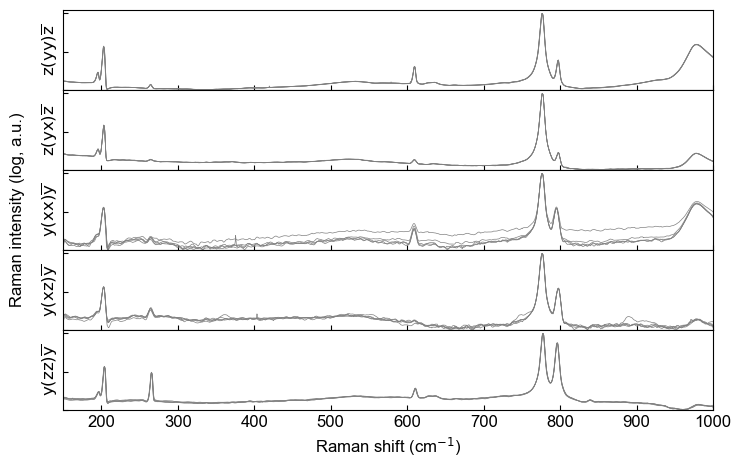

In [5]:
raman = [ "zyyz", "zyxz", "yxxy", "yxzy", "yzzy" ]
title = [ "$\\mathrm{z(yy)\\overline{z}}$", "$\\mathrm{z(yx)\\overline{z}}$", "$\\mathrm{y(xx)\\overline{y}}$", "$\\mathrm{y(xz)\\overline{y}}$", "$\\mathrm{y(zz)\\overline{y}}$" ]
fig, axes = plt.subplots(5, figsize=(6.5, 4))

for i in range(0, 5):
  for j in range(1, 6):
    file = open(f"../stuff/42/20250331/1/{raman[i]}/{j}.txt", 'r', encoding='utf-8', errors='ignore')
    data = np.loadtxt(file, comments='#')
    # 平移并缩放y，使得最小值为 10，最大值为 1000
    data[:,1] = 10 + (data[:,1] - data[:,1].min()) / (data[:,1].max() - data[:,1].min()) * 990
    axes[i].plot(data[:,0], np.log10(data[:,1]), color="gray", linewidth=0.5)
  axes[i].set(xlim=[150, 1000], ylim=[1, 3.1])
  fig.text(-0.02, 0.9 - i * 0.2, title[i], va='center', ha='center', rotation='vertical', fontsize=12, fontname='Arial')
  axes[i].tick_params(direction='in')
  axes[i].set_xticks(range(200, 1001, 100))
  axes[i].set_xticklabels([])
  axes[i].set_yticklabels([])
fig.text(-0.07, 0.5, "Raman intensity (log, a.u.)", va='center', ha='center', rotation='vertical', fontsize=12, fontname='Arial')
axes[4].set_xticklabels(range(200, 1001, 100), fontsize=12, fontname='Arial')
axes[4].set_xlabel("Raman shift (cm$^{-1}$)", fontsize=12, fontname='Arial')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
fig.savefig(f'画图/拉曼整体图/拉曼.svg', format='svg', transparent=True)

In [10]:
raman = [ "zyyz", "zyxz", "yxxy", "yxzy", "yzzy" ]
color = [ "red", "blue", "green", "orange", "purple" ]
fig = go.Figure()
for i in range(0, 5):
  for j in range(1, 6):
    file = open(f"../stuff/42/20250331/1/{raman[i]}/{j}.txt", 'r', encoding='utf-8', errors='ignore')
    data = np.loadtxt(file, comments='#')
    # 平移并缩放y，使得最小值为 10，最大值为 1000
    # data[:,1] = 10 + (data[:,1] - data[:,1].min()) / (data[:,1].max() - data[:,1].min()) * 990
    fig.add_trace(go.Scatter(x=data[:,0], y=data[:,1], mode='lines', name=raman[i], line=dict(color=color[i])))
fig.update_layout(width=1440, height=900)
fig.show()